**Chargement et exploration initiale du dataset**

Ce code permet de charger le dataset contenant les donn√©es de trafic √† partir d'un fichier CSV. Une fois charg√©, il affiche les premi√®res lignes du dataset pour v√©rifier son contenu et identifier les colonnes pr√©sentes. Cette √©tape est cruciale pour s'assurer que les donn√©es sont bien import√©es et pr√™tes pour une exploration et un pr√©traitement ult√©rieurs.

In [ ]:
import pandas as pd

# Chargement du datasetfichier CSV
dataset_path = "C:/Users/ibrahim/Pictures/Trafic-main/data/Radar_Traffic_Counts.csv"
data = pd.read_csv(dataset_path)

if not isinstance(data, pd.DataFrame):
    raise TypeError("L'objet 'data' n'est pas un DataFrame. V√©rifiez que le fichier a bien √©t√© charg√© correctement.")

# Affichage des premi√®res lignes
print("Les premi√®res lignes du dataset :")
print(data.head())

# Affiche les informations du DataFrame
print("\nInformations sur le dataset :")
print(data.info())


Les premi√®res lignes du dataset :
                                       location_name  location_latitude  \
0         2021 BLK KINNEY AVE (NW 300ft NW of Lamar)          30.248691   
1                 CAPITAL OF TEXAS HWY / LAKEWOOD DR          30.371674   
2  400 BLK AZIE MORTON RD (South of Barton Spring...          30.264245   
3  400 BLK AZIE MORTON RD (South of Barton Spring...          30.264245   
4         2021 BLK KINNEY AVE (NW 300ft NW of Lamar)          30.248691   

   location_longitude  Year  Month  Day  Day of Week  Hour  Minute Time Bin  \
0          -97.770409  2018      1   23            2    22      15    22:15   
1          -97.785660  2017     12   16            6    19      45    19:45   
2          -97.765802  2018      1   23            2    21      45    21:45   
3          -97.765802  2018      1   23            2    21      45    21:45   
4          -97.770409  2018      1   23            2    22      15    22:15   

  Direction  Volume  
0       NaN      

**Exploration et nettoyage des donn√©es**

Ce bloc de code r√©alise une analyse initiale du dataset pour comprendre sa structure, les types de donn√©es qu'il contient et pour identifier les √©ventuelles valeurs manquantes. Ensuite, une gestion basique des valeurs manquantes est appliqu√©e en supprimant les lignes qui en contiennent. Enfin, les informations et un aper√ßu du dataset nettoy√© sont affich√©s pour s'assurer que le nettoyage a √©t√© correctement effectu√©.

In [ ]:
# Affichage des informations du dataset
print("Informations du dataset :")
print(data.info())  # Structure et types des donn√©es
print("\nPremi√®res lignes du dataset :")
print(data.head())

# V√©rification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(data.isnull().sum())

# Gestion des valeurs manquantes
data_cleaned = data.dropna()

# V√©rification apr√®s nettoyage
print("\nDonn√©es apr√®s nettoyage :")
print(data_cleaned.info())
print(data_cleaned.head())

Informations du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603861 entries, 0 to 4603860
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   location_name       object 
 1   location_latitude   float64
 2   location_longitude  float64
 3   Year                int64  
 4   Month               int64  
 5   Day                 int64  
 6   Day of Week         int64  
 7   Hour                int64  
 8   Minute              int64  
 9   Time Bin            object 
 10  Direction           object 
 11  Volume              int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 421.5+ MB
None

Premi√®res lignes du dataset :
                                       location_name  location_latitude  \
0         2021 BLK KINNEY AVE (NW 300ft NW of Lamar)          30.248691   
1                 CAPITAL OF TEXAS HWY / LAKEWOOD DR          30.371674   
2  400 BLK AZIE MORTON RD (South of Barton Spring...          30.264245  

**Suppression des lignes avec des valeurs manquantes**



In [15]:
# V√©rification du nombre de valeurs manquantes dans la colonne 'Direction'
print("Nombre de valeurs NaN dans la colonne 'Direction' :", data['Direction'].isna().sum())

# Supprime les lignes o√π la colonne 'Direction' est NaN
data_cleaned = data.dropna(subset=['Direction'])

# V√©rification de la nouvelle forme du dataset
print("Dimensions du dataset apr√®s suppression :", data_cleaned.shape)


Nombre de valeurs NaN dans la colonne 'Direction' : 262068
Dimensions du dataset apr√®s suppression : (4341793, 12)


**Calcul des statistiques descriptives**

Cette √©tape consiste √† r√©sumer les colonnes num√©riques du dataset en calculant des mesures statistiques cl√©s, telles que la moyenne, la m√©diane, l'√©cart-type, le minimum et le maximum. Ces statistiques nous donnent une id√©e g√©n√©rale des distributions des donn√©es et aident √† d√©tecter des anomalies ou des valeurs extr√™mes.

In [16]:
# Calcul des statistiques pour les colonnes num√©riques
stats_summary = data_cleaned.describe()

# Affiche les statistiques
print(stats_summary)


       location_latitude  location_longitude          Year         Month  \
count       4.341793e+06        4.341793e+06  4.341793e+06  4.341793e+06   
mean        3.029603e+01       -9.775958e+01  2.018200e+03  6.814161e+00   
std         5.300354e-02        2.787500e-02  7.081701e-01  3.353139e+00   
min         3.024387e+01       -9.781225e+01  2.017000e+03  1.000000e+00   
25%         3.025799e+01       -9.778171e+01  2.018000e+03  4.000000e+00   
50%         3.026680e+01       -9.775174e+01  2.018000e+03  7.000000e+00   
75%         3.033947e+01       -9.773726e+01  2.019000e+03  1.000000e+01   
max         3.040229e+01       -9.771761e+01  2.019000e+03  1.200000e+01   

                Day   Day of Week          Hour        Minute        Volume  
count  4.341793e+06  4.341793e+06  4.341793e+06  4.341793e+06  4.341793e+06  
mean   1.545859e+01  2.984069e+00  1.152905e+01  2.255076e+01  7.107279e+01  
std    8.779839e+00  2.016226e+00  6.921776e+00  1.679784e+01  6.339376e+01  
min

**Analyse exploratoire visuelle des volumes de trafic**

Cette √©tape vise √† analyser comment le trafic √©volue au fil du temps. Nous allons examiner les volumes de trafic par heure, par jour de la semaine, et par mois pour d√©tecter des patterns ou des saisons qui pourraient influencer le trafic.

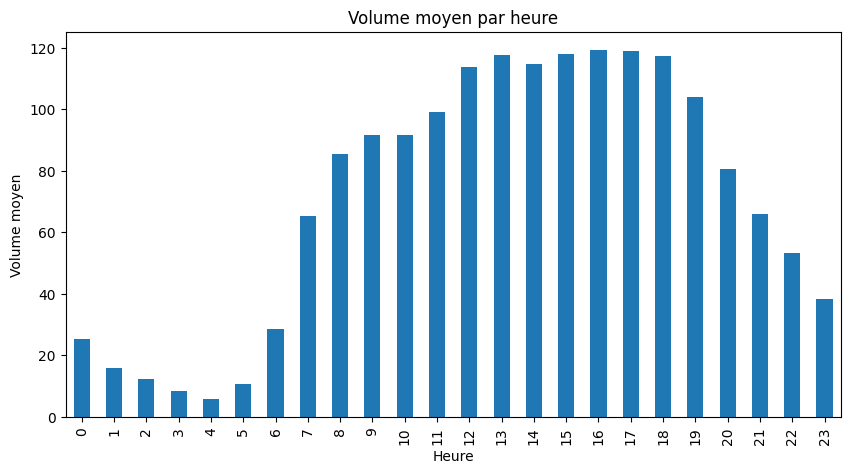

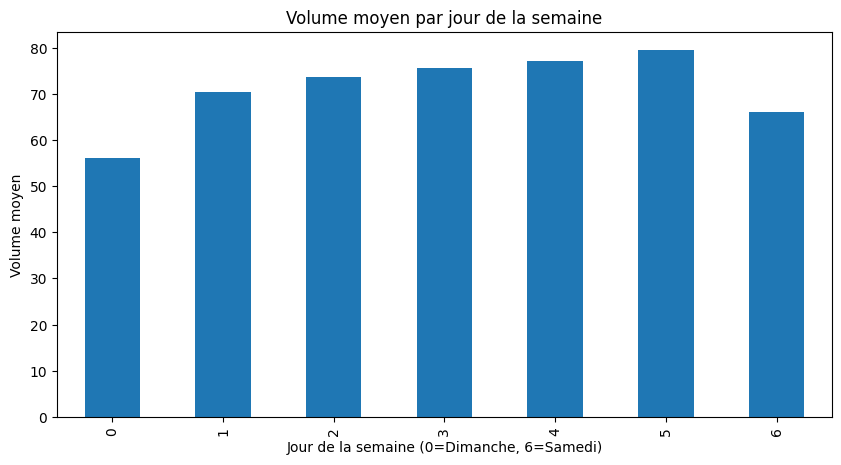

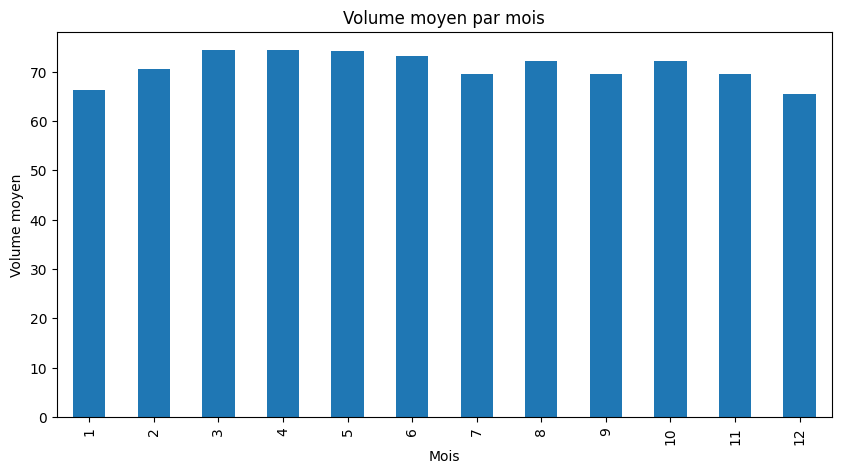

In [17]:
import matplotlib.pyplot as plt

# Volume de trafic par heure
data_cleaned.groupby('Hour')['Volume'].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Volume moyen par heure")
plt.xlabel("Heure")
plt.ylabel("Volume moyen")
plt.show()

# Volume de trafic par jour de la semaine
data_cleaned.groupby('Day of Week')['Volume'].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Volume moyen par jour de la semaine")
plt.xlabel("Jour de la semaine (0=Dimanche, 6=Samedi)")
plt.ylabel("Volume moyen")
plt.show()

# Volume de trafic par mois
data_cleaned.groupby('Month')['Volume'].mean().plot(kind='bar', figsize=(10, 5))
plt.title("Volume moyen par mois")
plt.xlabel("Mois")
plt.ylabel("Volume moyen")
plt.show()


**Pr√©paration des donn√©es temporelles et encodage des jours de la semaine**

Pour optimiser les performances des mod√®les de deep learning, nous ajoutons des caract√©ristiques utiles aux donn√©es existantes. Dans cette √©tape, nous :

1. Transformons la colonne Time Bin en minutes depuis minuit pour obtenir une valeur num√©rique.
2. Encodons la colonne Day of Week (jour de la semaine) en une repr√©sentation cat√©gorique ou num√©rique si n√©cessaire.

In [ ]:
import numpy as np

# Conversion de 'Time Bin' en minutes depuis minuit
time_bin_minutes = np.array([
    int(x.split(':')[0]) * 60 + int(x.split(':')[1])
    for x in data_cleaned['Time Bin']
])

# Encodage de 'Day of Week' en One-Hot Encoding
days = data_cleaned['Day of Week'].values
unique_days = sorted(set(days))
day_of_week_encoded = np.zeros((len(days), len(unique_days)))

for idx, day in enumerate(unique_days):
    day_of_week_encoded[:, idx] = (days == day).astype(int)

# Cr√©ation d'une copie pour √©viter SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Ajout de 'Time Bin Minutes' et les colonnes encod√©es au dataset original
data_cleaned.loc[:, 'Time Bin Minutes'] = time_bin_minutes
for idx, day in enumerate(unique_days):
    data_cleaned.loc[:, f'Day_{day}'] = day_of_week_encoded[:, idx]

# R√©sultat v√©rifi√©
print(data_cleaned[['Time Bin', 'Time Bin Minutes']].head())
print(data_cleaned.filter(like='Day_').head())

# Ajout de la variable data_prepared pour la prochaine √©tape
data_prepared = data_cleaned.copy()


  Time Bin  Time Bin Minutes
1    19:45              1185
2    21:45              1305
3    21:45              1305
5    22:15              1335
6    22:15              1335
   Day_0  Day_1  Day_2  Day_3  Day_4  Day_5  Day_6
1    0.0    0.0    0.0    0.0    0.0    0.0    1.0
2    0.0    0.0    1.0    0.0    0.0    0.0    0.0
3    0.0    0.0    1.0    0.0    0.0    0.0    0.0
5    0.0    0.0    1.0    0.0    0.0    0.0    0.0
6    0.0    0.0    1.0    0.0    0.0    0.0    0.0


**Pr√©paration des donn√©es pour l'entra√Ænement du mod√®le**

La normalisation consiste √† redimensionner les colonnes num√©riques pour les placer dans une plage similaire (par exemple, entre 0 et 1). Cela aide les mod√®les √† converger plus rapidement et am√©liore la stabilit√© des calculs.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# D√©fininition de la taille de la fen√™tre
window_size = 7 

#Colonnes pertinentes pour le mod√®le
columns_to_keep = ['Time Bin Minutes', 'Volume'] + list(data_prepared.filter(like='Day_').columns)

# Normalisation des colonnes num√©riques √† normaliser
columns_to_normalize = ['Volume', 'Time Bin Minutes']
scaler = MinMaxScaler()

# V√©rification des colonnes avant de continuer
if not all(col in data_prepared.columns for col in columns_to_keep):
    raise ValueError(f"Certaines colonnes manquent dans 'data_prepared' : {columns_to_keep}")

# Copie pour √©viter d'alt√©rer l'original
data_prepared_normalized = data_prepared.copy()

# Normalisation des colonnes num√©riques
data_prepared_normalized[columns_to_normalize] = scaler.fit_transform(data_prepared_normalized[columns_to_normalize])

# G√©n√©ration du tableau NumPy √† partir des donn√©es normalis√©es
data_array = data_prepared_normalized[columns_to_keep].values
print(f"Forme initiale des donn√©es : {data_array.shape}")

#G√©n√®re les s√©quences et les cibles
num_windows = len(data_array) - window_size
if num_windows <= 0:
    raise ValueError("La taille totale des donn√©es est insuffisante pour cr√©er des s√©quences avec la fen√™tre sp√©cifi√©e.")

input_sequences = np.array([data_array[i:i + window_size] for i in range(num_windows)])
targets = np.array([data_array[i + window_size, 1] for i in range(num_windows)])

# V√©rification des dimensions des s√©quences et des cibles
print(f"Forme des s√©quences g√©n√©r√©es : {input_sequences.shape}")
print(f"Forme des cibles g√©n√©r√©es : {targets.shape}")

#Conversion en DataFrame pour faciliter l'utilisation
data_final = pd.DataFrame({
    'Input Sequence': list(input_sequences),
    'Target': targets
})

# Affichage des dimensions des donn√©es g√©n√©r√©es
print(f"Nombre total de fen√™tres g√©n√©r√©es : {len(data_final)}")
print(data_final.head())

# Assignation des donn√©es √† X et y
X = np.stack(data_final['Input Sequence'].values)
y = data_final['Target'].values

# V√©rification des formes finales de X et y
print(f"Forme finale de X : {X.shape}") 
print(f"Forme finale de y : {y.shape}")


Forme initiale des donn√©es : (4341793, 9)
Forme des s√©quences g√©n√©r√©es : (4341786, 7, 9)
Forme des cibles g√©n√©r√©es : (4341786,)
Nombre total de fen√™tres g√©n√©r√©es : 4341786
                                      Input Sequence    Target
0  [[0.831578947368421, 0.403921568627451, 0.0, 0...  0.156863
1  [[0.9157894736842105, 0.17254901960784313, 0.0...  0.192157
2  [[0.9157894736842105, 0.050980392156862744, 0....  0.184314
3  [[0.9368421052631578, 0.10196078431372549, 0.0...  0.325490
4  [[0.9368421052631578, 0.12156862745098039, 0.0...  0.419608
Forme finale de X : (4341786, 7, 9)
Forme finale de y : (4341786,)


**Construction et pr√©paration du mod√®le CNN + LSTM**

Dans cette √©tape, nous d√©finissons et pr√©parons un mod√®le combinant les architectures CNN (Convolutional Neural Network) et LSTM (Long Short-Term Memory), con√ßu pour traiter des s√©quences temporelles tout en capturant √† la fois les d√©pendances locales (avec CNN) et les d√©pendances √† long terme (avec LSTM).

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Ajustement de X pour reshape
timesteps = 7  
num_features = X.shape[2] 
num_samples = (X.shape[0] // timesteps) * timesteps

if X.shape[0] % timesteps != 0:
    padding = timesteps - (X.shape[0] % timesteps)
    print(f"Ajout de padding : {padding} lignes")
    X = np.pad(X, ((0, padding), (0, 0), (0, 0)), mode='constant', constant_values=0)
    y = np.pad(y, (0, padding), mode='constant', constant_values=0)

# Reshape pour inclure les timesteps
X = X.reshape((-1, timesteps, num_features))
y = y[:len(X)] 
print(f"Nouvelle forme de X : {X.shape} (nombre_samples, timesteps, num_features)")
print(f"Nouvelle forme de y : {y.shape} (nombre_samples,)")

# Construction du mod√®le
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(1, activation='linear'))
])

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Affichage du r√©sum√© du mod√®le
model.summary()


Ajout de padding : 6 lignes
Nouvelle forme de X : (4341792, 7, 9) (nombre_samples, timesteps, num_features)
Nouvelle forme de y : (4341792,) (nombre_samples,)


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv1d (Conv1D)                 ‚îÇ (None, 5, 64)          ‚îÇ         1,792 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d (MaxPooling1D)    ‚îÇ (None, 2, 64)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 2, 64)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_1 (Conv1D)               ‚îÇ (None, 0, 128)         ‚îÇ        24,704 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_1 (MaxPooling1D)  ‚îÇ (None, 0, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_6 (Dropout)             ‚îÇ (None, 0, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_5 (LSTM)                   ‚îÇ (None, 0, 100)         ‚îÇ        91,600 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_7 (Dropout)             ‚îÇ (None, 0, 100)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_6 (LSTM)                   ‚îÇ (None, 0, 100)         ‚îÇ        80,400 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_8 (Dropout)             ‚îÇ (None, 0, 100)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_7 (LSTM)                   ‚îÇ (None, 0, 100)         ‚îÇ        80,400 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ

 Total params: 359,397 (1.37 MB)

 Trainable params: 359,397 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

**Entra√Ænement du mod√®le**

Nous entra√Ænons le mod√®le sur les donn√©es pr√©par√©es :

En utilisant une validation crois√©e (validation_split).
En sp√©cifiant le nombre d'√©poques et la taille des lots.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# V√©rification des donn√©es avant l'entra√Ænement
try:
    print(f"Forme de X avant ajustement : {X.shape}")
    print(f"Forme de y : {y.shape}")
except NameError:
    raise NameError("Les variables X et y ne sont pas d√©finies. Assurez-vous d'avoir pr√©par√© les donn√©es correctement avant cette √©tape.")

# V√©rification de coh√©rence entre X et y
if X.shape[0] != y.shape[0]:
    print("Ajustement de y pour correspondre √† X...")
    y = y[:X.shape[0]]  
    print(f"Nouvelle forme de y : {y.shape}")

# D√©finition du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',        
    patience=10,               
    restore_best_weights=True  
)

# V√©rification et ajustement du kernel_size
kernel_size = min(2, X.shape[1]) 
print(f"Utilisation de kernel_size = {kernel_size}")

# Construction du mod√®le avec la couche Input
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),  # Couche Input pour d√©finir la forme
    Conv1D(filters=64, kernel_size=kernel_size, activation='relu'),
    MaxPooling1D(pool_size=2),  # R√©duction de la dimension
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    Dense(1, activation='linear')  # Couche de sortie
])

# Compilation du mod√®le
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Entra√Ænement du mod√®le
history = model.fit(
    X, y,
    epochs=10,  # ici nous utilisons 10 √©poques
    batch_size=32,  # Taille des lots d'entra√Ænement
    validation_split=0.2,  #20 % des donn√©es pour validation
    callbacks=[early_stopping],
    verbose=1  # Affichage des d√©tails de chaque epoque
)

# Chemin complet pour sauvegarder le mod√®le
save_path = "C:/Users/ibrahim/Pictures/Trafic-main/models/traffic_prediction_model_complex.keras"
model.save(save_path)
print(f"Mod√®le entra√Æn√© et sauvegard√© avec succ√®s √† l'emplacement : {save_path}")


Forme de X avant ajustement : (4341792, 7, 9)
Forme de y : (4341792,)
Utilisation de kernel_size = 2
Epoch 1/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 907s 8ms/step - loss: 0.0614 - mae: 0.2067 - val_loss: 0.0629 - val_mae: 0.2081
Epoch 2/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1386s 13ms/step - loss: 0.0613 - mae: 0.2067 - val_loss: 0.0625 - val_mae: 0.2085
Epoch 3/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1007s 9ms/step - loss: 0.0612 - mae: 0.2065 - val_loss: 0.0626 - val_mae: 0.2073
Epoch 4/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1030s 9ms/step - loss: 0.0613 - mae: 0.2066 - val_loss: 0.0627 - val_mae: 0.2082
Epoch 5/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1001s 9ms/step - loss: 0.0613 - mae: 0.2066 - val_loss: 0.0625 - val_mae: 0.2079
Epoch 6/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

**√âvaluation des performances du mod√®le**



1. Visualisation des courbes de perte

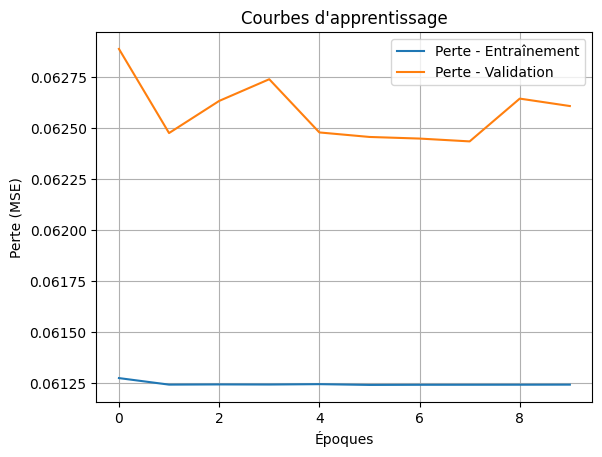

In [44]:
if 'history' in locals():
    plt.plot(history.history['loss'], label='Perte - Entra√Ænement')
    plt.plot(history.history['val_loss'], label='Perte - Validation')
    plt.title("Courbes d'apprentissage")
    plt.xlabel("√âpoques")
    plt.ylabel("Perte (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("La variable 'history' n'est pas d√©finie. Assurez-vous que le mod√®le a √©t√© entra√Æn√©.")


2.  Calcul des m√©triques (MSE et MAE)

In [45]:
# √âvaluation sur le jeu de validation
val_loss, val_mae = model.evaluate(X, y, verbose=0)
print(f"Perte sur validation (MSE) : {val_loss:.4f}")
print(f"Erreur absolue moyenne (MAE) : {val_mae:.4f}")


Perte sur validation (MSE) : 0.0604
Erreur absolue moyenne (MAE) : 0.2056


**Chargement et utilisation du mod√®le**

1. Chargement du mod√®le sauvegard√©

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Chargement du mod√®le avec les m√©triques sp√©cifiques
load_path = "C:/Users/ibrahim/Pictures/Trafic-main/models/traffic_prediction_model_complex.keras"
model = load_model(
    load_path,
    custom_objects={
        'mse': MeanSquaredError(),
        'mae': MeanAbsoluteError()
    }
)
print("Mod√®le charg√© avec succ√®s.")



Mod√®le charg√© avec succ√®s.


2. Pr√©dictions et comparaison avec les valeurs r√©elles

In [ ]:
# Faire des pr√©dictions
sample_data = X[:10]  # Exemple : Les 10 premi√®res lignes
predictions = model.predict(sample_data).flatten()

# Affichage des pr√©dictions et les valeurs r√©elles
print("Pr√©dictions :", predictions)
print("Valeurs r√©elles :", y[:10])


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 432ms/step
Pr√©dictions : [0.2790217  0.27843702 0.2781616  0.27877223 0.27825364 0.27835688
 0.2787686  0.27825284 0.2785534  0.27863055 0.27846798 0.27864763
 0.27863055 0.2786717  0.27875167 0.27889946 0.27877674 0.2797367
 0.27912414 0.2788841  0.28086117 0.27916914 0.27987638 0.28067362
 0.2792288  0.2810168  0.28023002 0.28025538 0.28082255 0.2802868 ]
Valeurs r√©elles : [0.15686275 0.19215686 0.18431373 0.3254902  0.41960784 0.42745098
 0.25490196 0.37254902 0.34509804 0.18823529]


**Analyse des r√©sultats**

1. Comparaison des pr√©dictions et des valeurs r√©elles

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step 


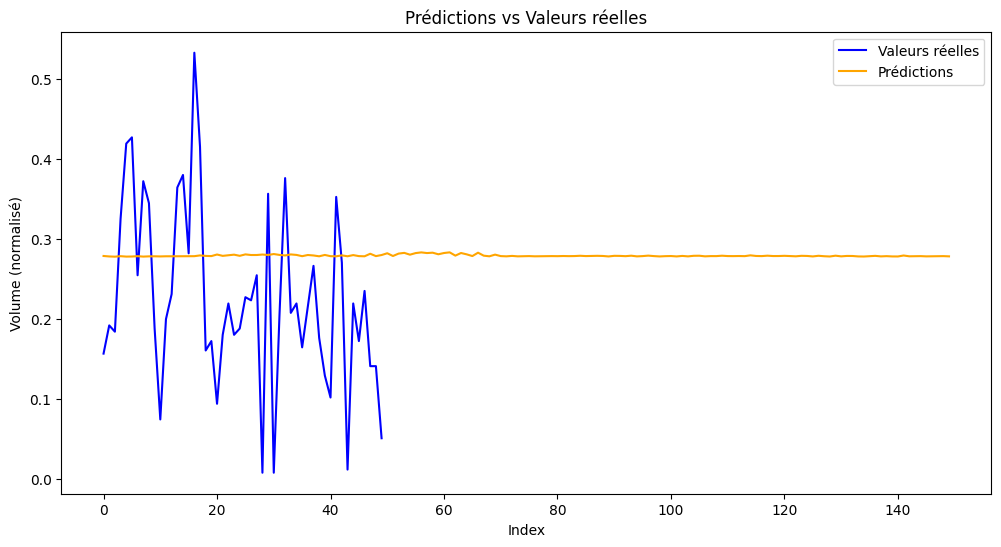

In [ ]:
# √âchantillon des valeurs r√©elles et pr√©dites
real_values = y[:50]
predicted_values = model.predict(X[:50]).flatten()

# Tra√ßage des deux courbes
plt.figure(figsize=(12, 6))
plt.plot(real_values, label='Valeurs r√©elles', color='blue')
plt.plot(predicted_values, label='Pr√©dictions', color='orange')
plt.title('Pr√©dictions vs Valeurs r√©elles')
plt.xlabel('Index')
plt.ylabel('Volume (normalis√©)')
plt.legend()
plt.show()


2. Distribution des erreurs

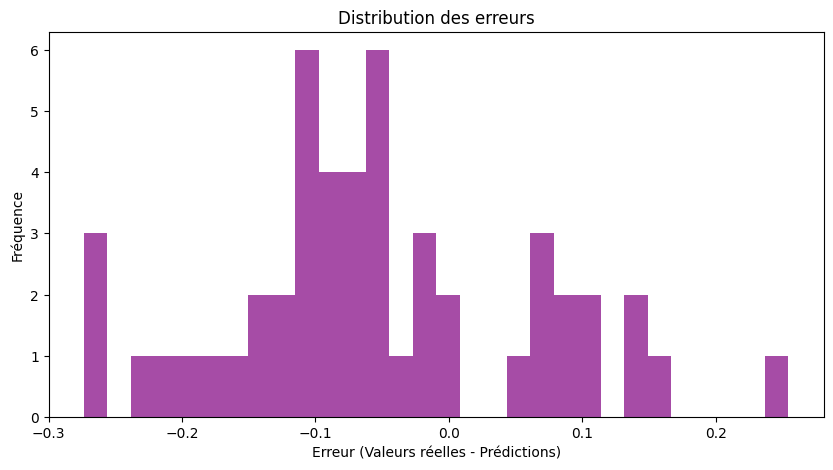

In [ ]:
real_values = real_values[:len(predicted_values)]
predicted_values = predicted_values[:len(real_values)]

# Calcul des erreurs
errors = real_values - predicted_values

# Histogramme des erreurs
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=30, color='purple', alpha=0.7)
plt.title('Distribution des erreurs')
plt.xlabel('Erreur (Valeurs r√©elles - Pr√©dictions)')
plt.ylabel('Fr√©quence')
plt.show()



**Calcul du coefficient de d√©termination ùëÖ^2**

Ce code calcule le coefficient de d√©termination (ùëÖ^2), une m√©trique qui mesure la qualit√© des pr√©dictions du mod√®le. 

In [50]:
from sklearn.metrics import r2_score

X_adjusted = X[:len(y)]  

# Effectuer les pr√©dictions
predicted_values = model.predict(X_adjusted)

# V√©rification des dimensions et ajustement
if predicted_values.ndim > 1:
    predicted_values = predicted_values.reshape(-1)  # Aplatir les pr√©dictions

# V√©rification lds tailles avant de faire le calcul
if len(predicted_values) > len(y):
    predicted_values = predicted_values[:len(y)]
elif len(predicted_values) < len(y):
    y = y[:len(predicted_values)]

print(f"Taille de y : {len(y)}")
print(f"Taille des pr√©dictions : {len(predicted_values)}")

# Calcul de R^2 apr√®s ajustement
try:
    r2 = r2_score(y, predicted_values)
    print(f"Coefficient de d√©termination (R^2) : {r2:.4f}")
except ValueError as e:
    print(f"Erreur lors du calcul de R^2 : {e}")


135681/135681 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 426s 3ms/step
Taille de y : 4341792
Taille des pr√©dictions : 4341792
Coefficient de d√©termination (R^2) : -0.0004


**Construction du mod√®le Transformer**

Dans cette √©tape, nous construisons un mod√®le Transformer capable de traiter des s√©quences temporelles complexes. Le mod√®le utilise des blocs Transformer, compos√©s de couches de Multi-Head Attention pour apprendre les relations entre les diff√©rents timesteps, suivies de connexions r√©siduelles et de normalisation pour am√©liorer la stabilit√© de l'apprentissage. Chaque bloc inclut √©galement un r√©seau feedforward pour enrichir les caract√©ristiques extraites. Une √©tape de pooling global est ensuite utilis√©e pour condenser l'information sur toute la s√©quence en une seule repr√©sentation, avant qu'une couche dense finale ne produise une pr√©diction adapt√©e √† la t√¢che de r√©gression.

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

def build_transformer_model(input_shape, num_heads=4, ff_dim=128, num_transformer_blocks=2):
    # Entr√©e des donn√©es
    inputs = Input(shape=input_shape)

    # Blocs Transformer
    x = inputs
    for _ in range(num_transformer_blocks):
        # Multi-Head Attention
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(x, x)
        attn_output = Dropout(0.1)(attn_output)
        x = LayerNormalization(epsilon=1e-6)(x + attn_output)

        # R√©seau feedforward
        ffn_output = Dense(ff_dim, activation="relu")(x)
        ffn_output = Dense(input_shape[-1])(ffn_output)
        ffn_output = Dropout(0.1)(ffn_output)
        x = LayerNormalization(epsilon=1e-6)(x + ffn_output)

    # Pooling global pour obtenir une seule sortie par s√©quence
    x = GlobalAveragePooling1D()(x)

    # Couche dense finale pour la pr√©diction
    outputs = Dense(1, activation="linear")(x)

    # Construiction du mod√®le
    model = Model(inputs, outputs)
    return model


**Compilation et configuration du mod√®le Transformer**

Cette √©tape consiste √† configurer le mod√®le Transformer pour la t√¢che de pr√©diction. D'abord, la forme des donn√©es d'entr√©e est d√©finie pour s'assurer que le mod√®le re√ßoit des s√©quences de dimensions correctes. Ensuite, le mod√®le est construit avec des param√®tres sp√©cifiques comme le nombre de t√™tes d'attention, la dimension du r√©seau feedforward, et le nombre de blocs Transformer. Le mod√®le est compil√© avec l'optimiseur Adam, une fonction de perte adapt√©e √† la r√©gression (MSE), et la m√©trique MAE pour √©valuer les performances. Enfin, un r√©sum√© du mod√®le est affich√© pour valider sa structure.

In [54]:
# Forme d'entr√©e pour le mod√®le
input_shape = (X.shape[1], X.shape[2])

# Construiction du mod√®le Transformer
transformer_model = build_transformer_model(
    input_shape=input_shape,
    num_heads=4,  # Nombre de t√™tes d'attention
    ff_dim=128,   # Dimension du r√©seau feedforward
    num_transformer_blocks=2  # Nombre de blocs Transformer
)

# Compilation du mod√®le
transformer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Affichage du r√©sum√© du mod√®le
transformer_model.summary()


Model: "functional_52"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_7       ‚îÇ (None, 7, 9)      ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ multi_head_attenti‚Ä¶ ‚îÇ (None, 7, 9)      ‚îÇ      1,413 ‚îÇ input_layer_7[0]‚Ä¶ ‚îÇ
‚îÇ (MultiHeadAttentio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ input_layer_7[0]‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_22          ‚îÇ (None, 7, 9)      ‚îÇ          0 ‚îÇ multi_head_atten‚Ä¶ ‚îÇ
‚îÇ (Dropout)           ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ add (Add)           ‚îÇ (None, 7, 9)      ‚îÇ          0 ‚îÇ input_layer_7[0]‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ dropout_22[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ layer_normalization ‚îÇ (None, 7, 9)      ‚îÇ         18 ‚îÇ add[0][0]         ‚îÇ
‚îÇ (LayerNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)     ‚îÇ (None, 7, 128)    ‚îÇ      1,280 ‚îÇ layer_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_8 (Dense)     ‚îÇ (None, 7, 9)      ‚îÇ      1,161 ‚îÇ dense_7[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_23          ‚îÇ (None, 7, 9)      ‚îÇ          0 ‚îÇ dense_8[0][0]     ‚îÇ
‚îÇ (Dropout)           ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ add_1 (Add)         ‚îÇ (None, 7, 9)      ‚îÇ          0 ‚îÇ layer_normalizat‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ                   ‚îÇ            ‚îÇ dropout_23[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 7,790 (30.43 KB)

 Trainable params: 7,790 (30.43 KB)

 Non-trainable params: 0 (0.00 B)

**Entra√Ænement et sauvegarde du mod√®le Transformer**

Dans cette √©tape, le mod√®le Transformer est entra√Æn√© sur les donn√©es d'entr√©e (X) et les cibles (y). Les hyperparam√®tres d'entra√Ænement, comme le nombre d'√©poques, la taille des lots, et la fraction des donn√©es r√©serv√©e √† la validation, sont sp√©cifi√©s. Une fois l'entra√Ænement termin√©, le mod√®le est sauvegard√© dans un fichier .keras pour une utilisation ou un d√©ploiement ult√©rieur. Cette sauvegarde permet de r√©utiliser le mod√®le sans avoir √† le r√©entra√Æner.

In [ ]:
# Entra√Ænement du mod√®le
history_transformer = transformer_model.fit(
    X, y,
    epochs=10,  # Nombre d'√©poques
    batch_size=32,  # Taille des lots
    validation_split=0.2,  # 20 % des donn√©es pour validation
    verbose=1  # Affichage des d√©tails
)
# Sauvegarde du mod√®le
transformer_save_path = "C:/Users/ibrahim/Pictures/Trafic-main/models/transformer_model.keras"
transformer_model.save(transformer_save_path)
print(f"Mod√®le Transformer sauvegard√© avec succ√®s √† l'emplacement : {transformer_save_path}")



Epoch 1/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2371s 22ms/step - loss: 0.0359 - mae: 0.1359 - val_loss: 0.0336 - val_mae: 0.1299
Epoch 2/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2760s 25ms/step - loss: 0.0337 - mae: 0.1299 - val_loss: 0.0335 - val_mae: 0.1300
Epoch 3/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2861s 26ms/step - loss: 0.0335 - mae: 0.1294 - val_loss: 0.0334 - val_mae: 0.1295
Epoch 4/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2891s 27ms/step - loss: 0.0335 - mae: 0.1293 - val_loss: 0.0334 - val_mae: 0.1296
Epoch 5/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2804s 26ms/step - loss: 0.0334 - mae: 0.1292 - val_loss: 0.0334 - val_mae: 0.1295
Epoch 6/10
108545/108545 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2868s 26ms/step - loss: 0.0334 - mae: 0.1291 - val_loss: 0.0338 - val_mae:

**√âvaluation des performances du mod√®le Transformer**

Cette √©tape √©value les performances du mod√®le Transformer sur les donn√©es d'entr√©e (X) et les cibles (y). Les m√©triques utilis√©es sont la perte moyenne quadratique (MSE), qui mesure l'√©cart moyen au carr√© entre les pr√©dictions et les valeurs r√©elles, et l'erreur absolue moyenne (MAE), qui quantifie la pr√©cision moyenne des pr√©dictions. Ces r√©sultats permettent de juger de la qualit√© du mod√®le sur l'ensemble de validation.

In [57]:
# √âvaluation sur les donn√©es
val_loss_transformer, val_mae_transformer = transformer_model.evaluate(X, y, verbose=0)
print(f"Perte (MSE) sur validation pour le Transformer : {val_loss_transformer:.4f}")
print(f"Erreur absolue moyenne (MAE) pour le Transformer : {val_mae_transformer:.4f}")


Perte (MSE) sur validation pour le Transformer : 0.0334
Erreur absolue moyenne (MAE) pour le Transformer : 0.1292


**Comparaison des courbes de validation entre CNN+LSTM et Transformer**

Ce code compare les courbes de perte (MSE) sur l'ensemble de validation pour les deux mod√®les : CNN+LSTM et Transformer. Il trace les pertes respectives au fil des √©poques, permettant de visualiser lequel des deux mod√®les converge mieux et offre une meilleure g√©n√©ralisation. Cette analyse aide √† identifier le mod√®le le plus performant pour la t√¢che donn√©e.

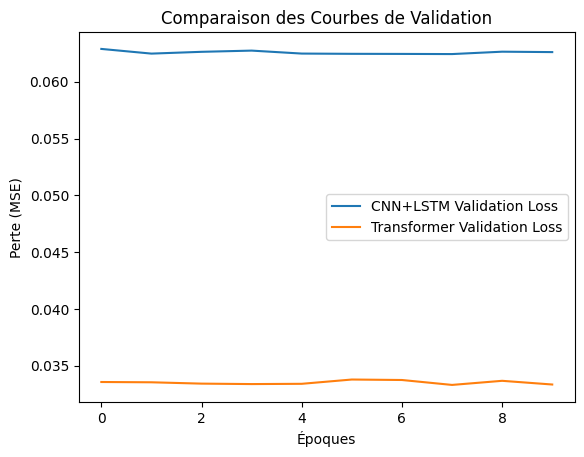

In [58]:
# Comparaison des courbes de perte
plt.plot(history.history['val_loss'], label='CNN+LSTM Validation Loss')
plt.plot(history_transformer.history['val_loss'], label='Transformer Validation Loss')
plt.title('Comparaison des Courbes de Validation')
plt.xlabel('√âpoques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.show()


**Comparaison des pr√©dictions entre CNN+LSTM et Transformer**

Ce code g√©n√®re les pr√©dictions du mod√®le Transformer pour un √©chantillon de 50 donn√©es, puis les compare aux valeurs r√©elles et aux pr√©dictions du mod√®le CNN+LSTM. Un graphique est trac√© pour visualiser les √©carts entre les mod√®les et les donn√©es r√©elles, permettant de d√©terminer lequel offre des pr√©dictions plus pr√©cises et align√©es avec les tendances observ√©es.

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 433ms/step


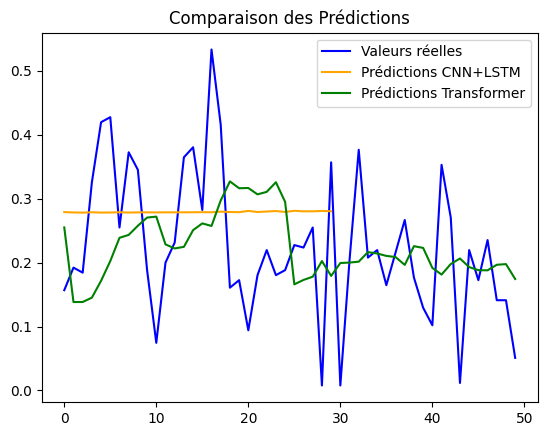

In [59]:
# Pr√©dictions avec Transformer
transformer_predictions = transformer_model.predict(X[:50]).flatten()

# Graphique de comparaison
plt.plot(y[:50], label='Valeurs r√©elles', color='blue')
plt.plot(predictions[:50], label='Pr√©dictions CNN+LSTM', color='orange')
plt.plot(transformer_predictions, label='Pr√©dictions Transformer', color='green')
plt.title('Comparaison des Pr√©dictions')
plt.legend()
plt.show()


**Calcul du coefficient de d√©termination (ùëÖ^2) pour le Transformer**

Cette √©tape √©value la capacit√© du mod√®le Transformer √† expliquer la variance des donn√©es r√©elles en calculant le coefficient de d√©termination (ùëÖ^2). Une valeur proche de 1 indique que le mod√®le pr√©dit efficacement les donn√©es cibles. Les pr√©dictions g√©n√©r√©es par le mod√®le Transformer sont compar√©es aux valeurs r√©elles pour mesurer cette performance. Cela permet de juger objectivement la qualit√© du mod√®le sur l'ensemble des donn√©es.

In [60]:
# pr√©dictions
predictions_transformer = transformer_model.predict(X).flatten()

# Calcul du coefficient de d√©termination (R¬≤)
r2_transformer = r2_score(y, predictions_transformer)

print(f"Coefficient de d√©termination (R¬≤) pour le mod√®le Transformer : {r2_transformer:.4f}")


135681/135681 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2292s 17ms/step
Coefficient de d√©termination (R¬≤) pour le mod√®le Transformer : 0.4601
